# Olatomiwa Akinlaja 2534648
# Kudzai Sibanda 935227

# Data Visualization Assignment 1

## Question 1
### 1.1.1 Data Cleaning and Outliers (Glass Dataset)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'GlassType']
glass = pd.read_csv('glass/glass.data', names=columns)

In [3]:
glass.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,GlassType
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
glass.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,GlassType
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


#### 1. Using visualisations, explore the feature variables to understand their distributions as well as the relationships between predictors. Here, include histograms, bar charts, correlation heatmaps, etc.

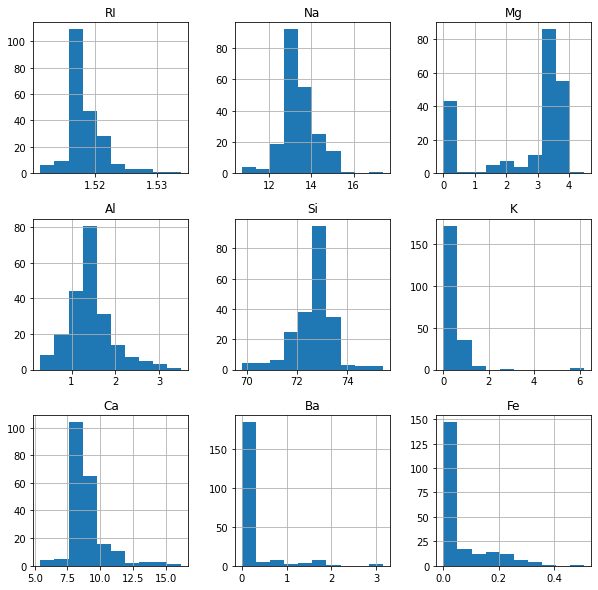

In [4]:
glass.drop(['GlassType', 'Id'], axis = 1).hist(figsize =(10,10))
plt.show()

In [5]:
corr_glass = glass.drop(['GlassType', 'Id'], axis = 1).corr()

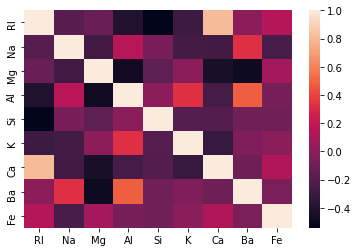

In [6]:
sns.heatmap(corr_glass)
plt.show()

#### 2. Can you find any outliers? Are any of the distributions of the features skewed? 3

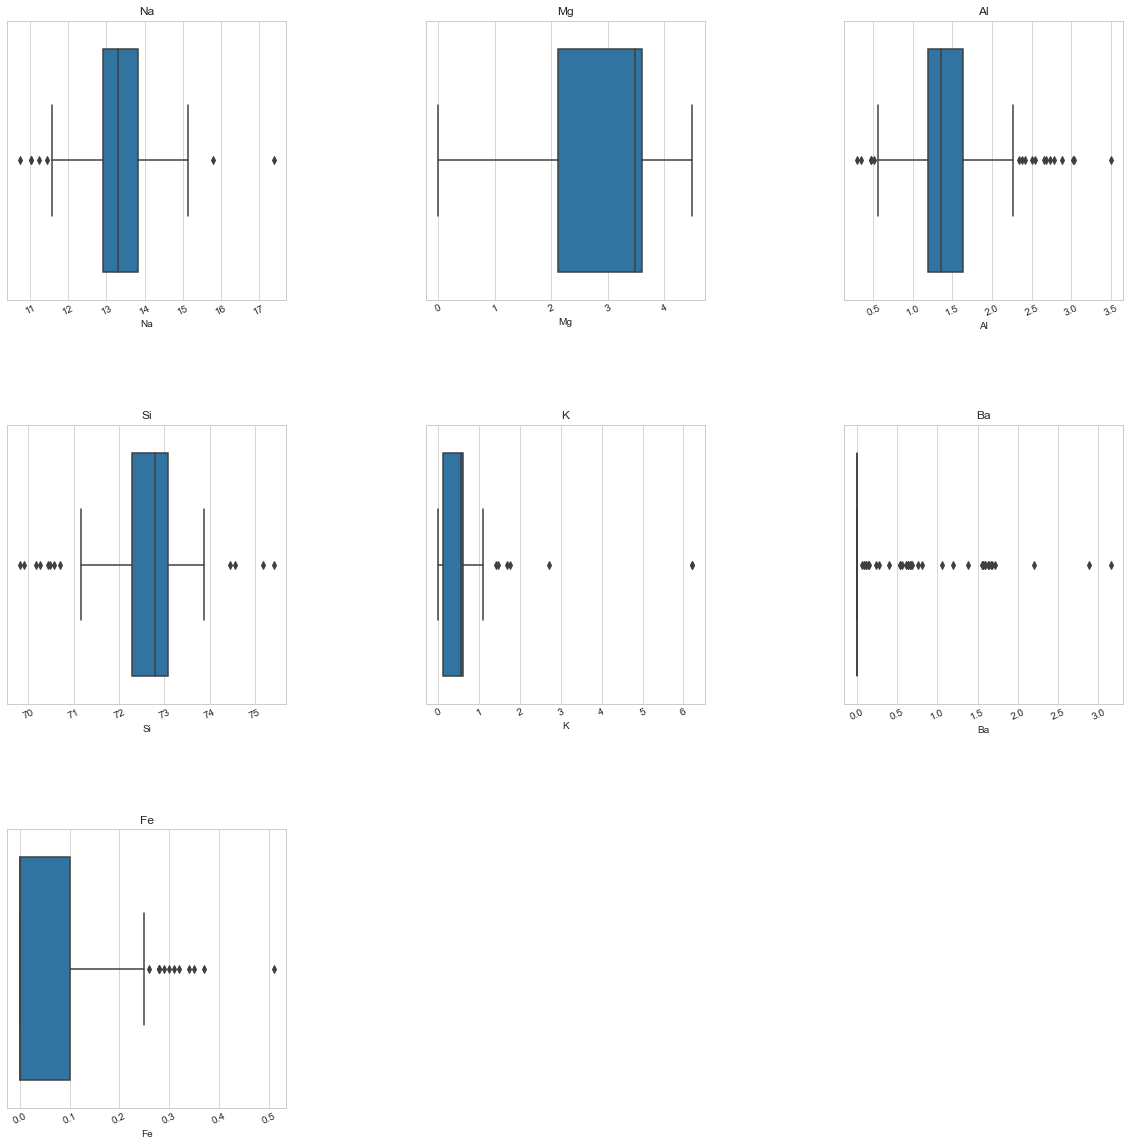

In [10]:

def plot_distribution(glass, cols=9, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(glass.shape[1]) / cols)
    for i, column in enumerate(glass.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if glass.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=glass)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.boxplot(glass[column])
            plt.xticks(rotation=25)

cols_to_plot = ['Na', 'Mg', 'Al', 'Si', 'K', 'Ba', 'Fe']
plot_distribution(glass[cols_to_plot], cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

+ There are outliers in the data as shown in the box plots above with the exception of Mg. Mg is skewed along with Al, Si, K, Fe and Ba being the worst one of the bunch. 
+ The distribution about the mean of the boxplots show that Mg, K, Ba, Fe are skewed. 

#### 3. What types of transformations of one (or more) of these features might improve the classification model? 1

+ Log transformation and percentile conversion are methods that could help the model to perform better using these features.

### 1.1.2 Data Cleaning and Missing values (Soy Beans)

In [16]:
columns = ['class', 'date', 'plant-stand', 'precip', 'temp', 'hail', 'crop-hist', \
           'area-damaged', 'severity', 'seed-tmt', 'germination', 'plant-growth', \
          'leaves', 'leafspots-halo', 'leafspots-marg', 'leafspot-size', 'leaf-shread', \
           'leaf-malf', 'leaf-mild', 'stem', 'lodging', 'stem-cankers', 'canker-lesion',\
          'fruiting-bodies', 'external decay', 'mycelium', 'int-discolor', 'sclerotia',\
          'fruit-pods', 'fruit spots', 'seed', 'mold-growth', 'seed-discolor', 'seed-size',\
          'shriveling', 'roots']
SoyBeans = pd.read_csv('soybeans/soybean-large.data', names=columns)

In [17]:
SoyBeans.head()

,class,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,diaporthe-stem-canker,6,0,2,1,0,1,1,1,0,...,0,0,0,4,0,0,0,0,0,0
1,diaporthe-stem-canker,4,0,2,1,0,2,0,2,1,...,0,0,0,4,0,0,0,0,0,0
2,diaporthe-stem-canker,3,0,2,1,0,1,0,2,1,...,0,0,0,4,0,0,0,0,0,0
3,diaporthe-stem-canker,3,0,2,1,0,1,0,2,0,...,0,0,0,4,0,0,0,0,0,0
4,diaporthe-stem-canker,6,0,2,1,0,2,0,1,0,...,0,0,0,4,0,0,0,0,0,0


In [18]:
def create_dict(vals):
    tmp_dict = {k: v for k, v in enumerate(vals.strip().split(',')) if v != '?'}
    tmp_dict['?'] = None
    return tmp_dict

maps = {
    'date': create_dict('april,may,june,july,august,september,october,?'),
    'plant-stand': create_dict('normal,lt-normal,?'),
    'precip': create_dict('lt-norm,norm,gt-norm,?'),
    'temp': create_dict('lt-norm,norm,gt-norm,?'),
    'hail': create_dict('yes,no,?'),
    'crop-hist': create_dict('diff-lst-year,same-lst-yr,same-lst-two-yrs,same-lst-sev-yrs,?'),
    'area-damaged': create_dict('scattered,low-areas,upper-areas,whole-field,?'),
    'severity': create_dict('minor,pot-severe,severe,?'),
    'seed-tmt': create_dict('none,fungicide,other,?'),
    'germination': create_dict('90-100%,80-89%,lt-80%,?'),
    'plant-growth': create_dict('norm,abnorm,?'),
    'leaves': create_dict('norm,abnorm'),
    'leafspots-halo': create_dict('absent,yellow-halos,no-yellow-halos,?'),
    'leafspots-marg': create_dict('w-s-marg,no-w-s-marg,dna,?'),
    'leafspot-size': create_dict('lt-1/8,gt-1/8,dna,?'),
    'leaf-shread': create_dict('absent,present,?'),
    'leaf-malf': create_dict('absent,present,?'),
    'leaf-mild': create_dict('absent,upper-surf,lower-surf,?'),
    'stem': create_dict('norm,abnorm,?'),
    'lodging': create_dict('yes,no,?'),
    'stem-cankers': create_dict('absent,below-soil,above-soil,above-sec-nde,?'),
    'canker-lesion': create_dict('dna,brown,dk-brown-blk,tan,?'),
    'fruiting-bodies': create_dict('absent,present,?'),
    'external decay': create_dict('absent,firm-and-dry,watery,?'),
    'mycelium': create_dict('absent,present,?'),
    'int-discolor': create_dict('none,brown,black,?'),
    'sclerotia': create_dict('absent,present,?'),
    'fruit-pods': create_dict('norm,diseased,few-present,dna,?'),
    'fruit spots': create_dict('absent,colored,brown-w/blk-specks,distort,dna,?'),
    'seed': create_dict('norm,abnorm,?'),
    'mold-growth': create_dict('absent,present,?'),
    'seed-discolor': create_dict('absent,present,?'),
    'seed-size': create_dict('norm,lt-norm,?'),
    'shriveling': create_dict('absent,present,?'),
    'roots': create_dict('norm,rotted,galls-cysts,?')
}

In [19]:
def get_map_val(key, val):
    if val == '?':
        search_val = '?'
    else:
        search_val = int(val)
        
    return maps.get(key).get(search_val)

for c in maps.keys():
    SoyBeans[c] = SoyBeans[c].apply(lambda x: get_map_val(c, x))

In [20]:
SoyBeans

,class,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,diaporthe-stem-canker,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
1,diaporthe-stem-canker,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
2,diaporthe-stem-canker,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
3,diaporthe-stem-canker,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
4,diaporthe-stem-canker,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,2-4-d-injury,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
303,herbicide-injury,may,lt-normal,None,lt-norm,None,same-lst-yr,scattered,None,None,...,None,None,dna,None,None,None,None,None,None,rotted
304,herbicide-injury,april,lt-normal,None,lt-norm,None,diff-lst-year,whole-field,None,None,...,None,None,dna,None,None,None,None,None,None,rotted
305,herbicide-injury,may,lt-normal,None,lt-norm,None,diff-lst-year,scattered,None,None,...,None,None,dna,None,None,None,None,None,None,rotted


#### 1. Produce visualisations showing the frequency distributions for the categorical features. Are any of the distributions redundant? 

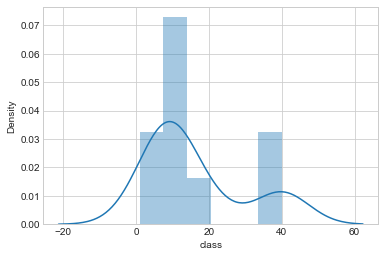

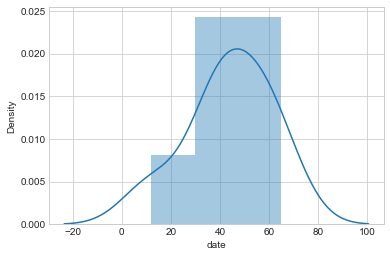

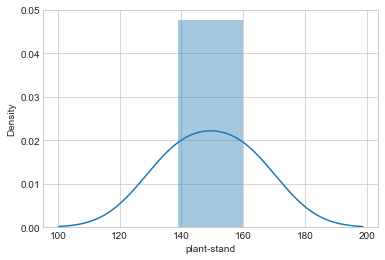

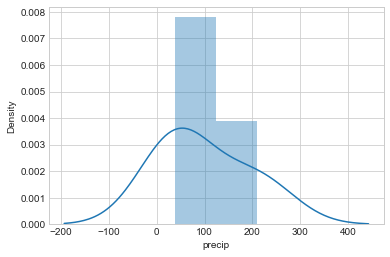

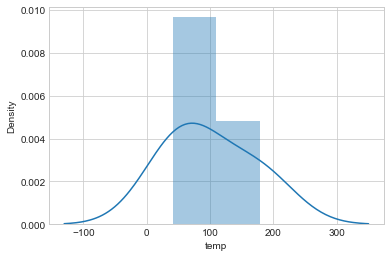

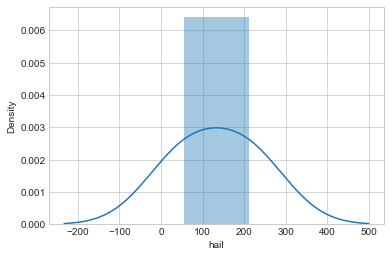

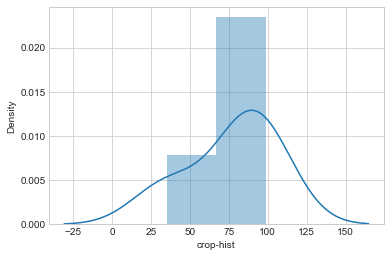

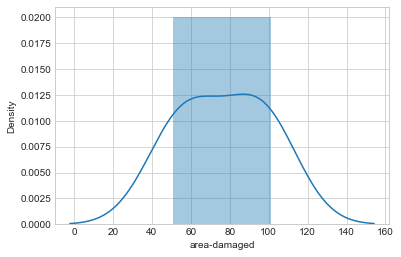

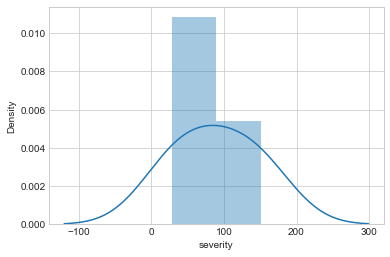

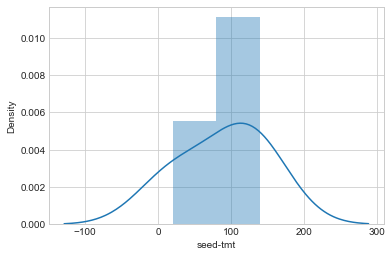

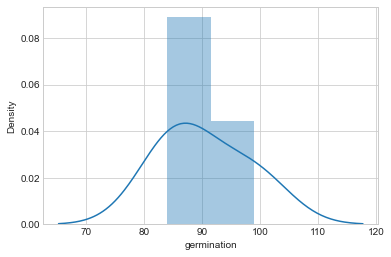

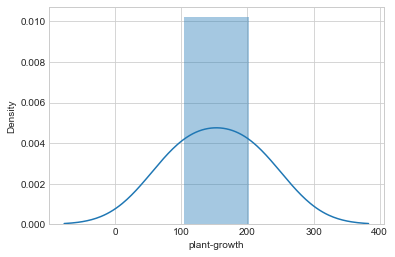

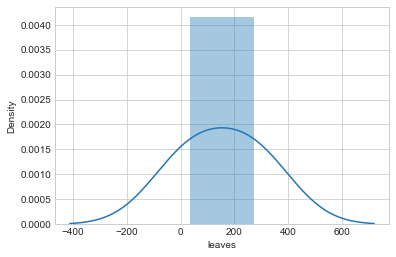

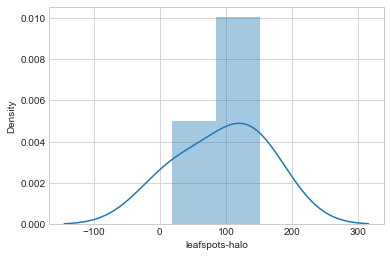

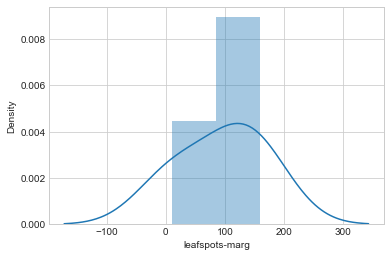

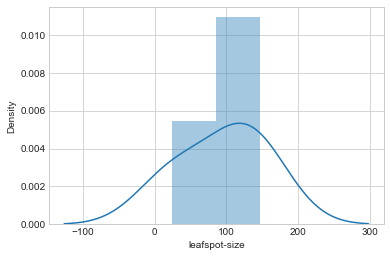

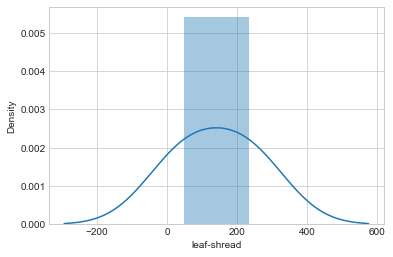

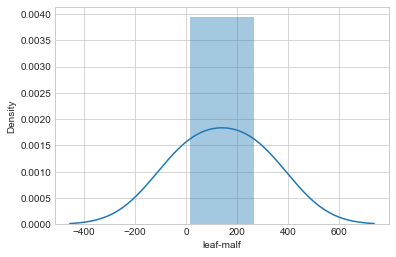

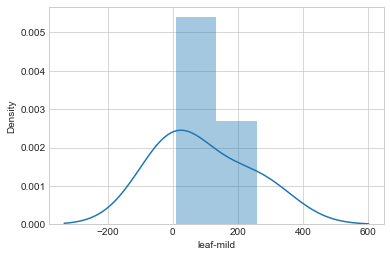

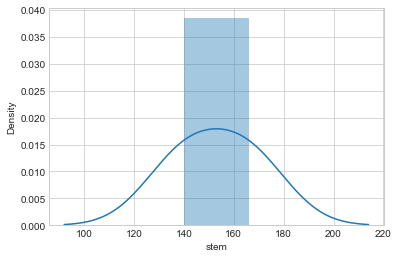

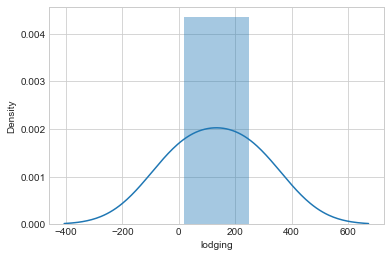

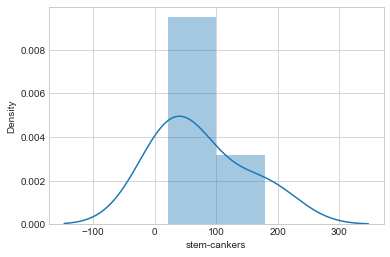

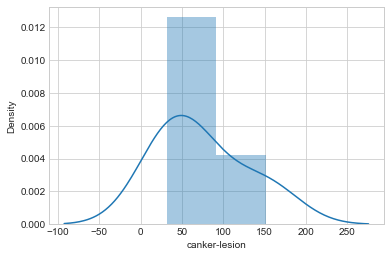

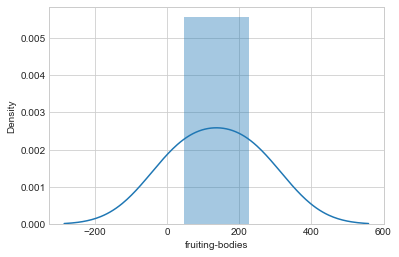

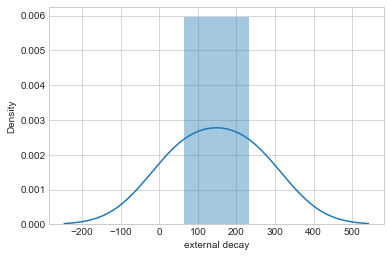

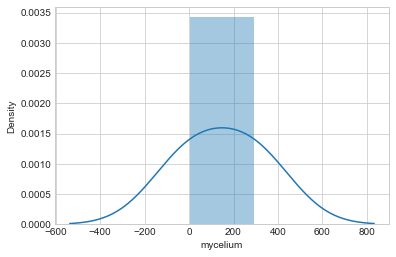

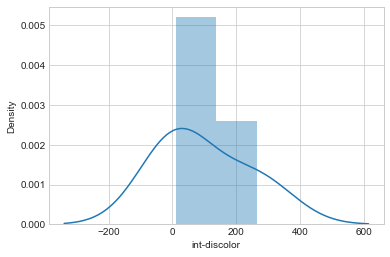

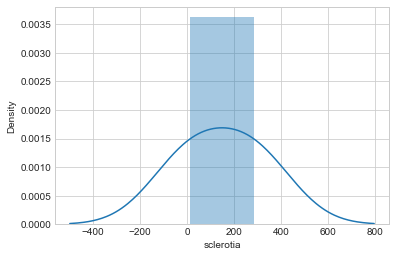

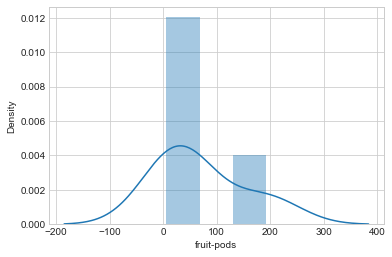

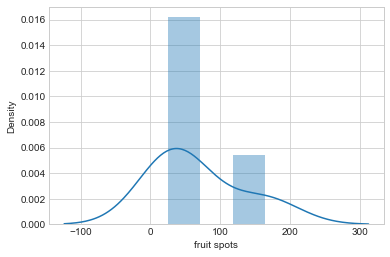

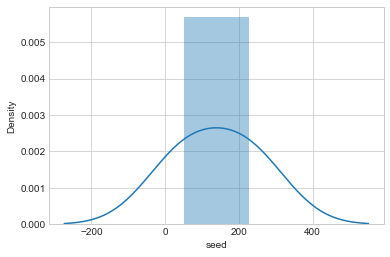

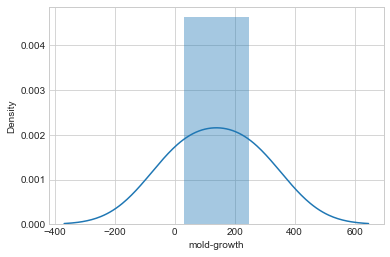

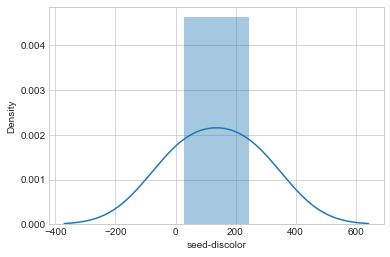

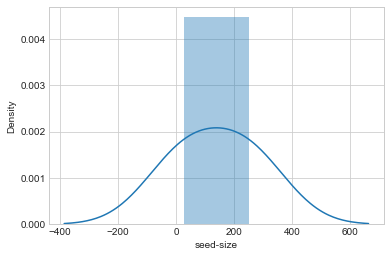

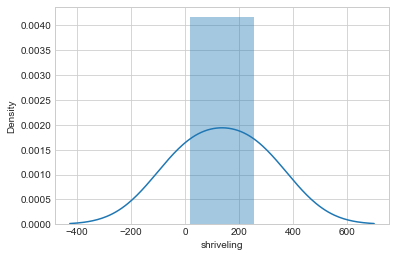

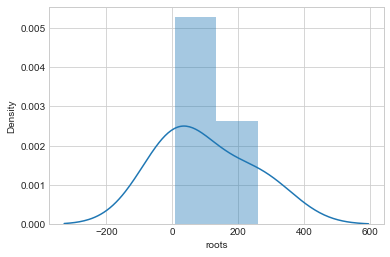

In [21]:
for i,k in enumerate(SoyBeans.columns):
    sns.distplot(SoyBeans[k].value_counts())
    plt.show()

Yes, they are redundant, as seen in the plots above.
plant-stand and hail and plant-growth and leaves, temp and precip and severity and leafspots-halo, 

#### 2. Roughly 18% of the data are missing. Are there particular features that are more likely to be missing? Does it appear to be related to the classes?
+ The features that are more likely to be missing are those which do not have a specific key value representation.

In [22]:
SoyBeans.describe()

,class,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
count,307,306,299,296,300,266,306,306,266,266,...,296,296,282,272,278,278,272,278,272,300
unique,19,7,2,3,3,2,4,4,3,3,...,3,2,4,4,2,2,2,2,2,3
top,brown-spot,september,normal,gt-norm,norm,yes,same-lst-two-yrs,low-areas,pot-severe,none,...,none,absent,norm,absent,norm,absent,absent,norm,absent,norm
freq,40,65,160,210,179,211,99,101,151,140,...,266,286,193,164,227,247,244,251,256,260


#### 3. Develop and implement a strategy for handling missing data, either by eliminating predictors or imputation. 

+ Since the Missing value is categorical, instead of eliminating or Imputing 'unknown', it might be better to insert the most frequent values within the column into the missing spot.

In [23]:
SoyBeans.isnull().any().sum()

34

In [24]:
# Imputing

for i, k in enumerate(SoyBeans.columns):
    SoyBeans[k].fillna(SoyBeans[k].value_counts().index[0], inplace=True)

In [25]:
SoyBeans.isnull().any().sum()

0

### 1.1.3 Telco Customer Churn

1. Convert categorical features to dummy variables (Yes/No counts as categorical).1
2. Plot the different features, including the distribution of the target variable.5
3. How are tenure and contract duration related? Show this with a visualisation.2
4. Look at the correlation between Churn and the other variables - are there strong negative or positive correlations? (Use f-regression or mutual-info-classif, for example).5
5. Produce plots to look at churn vs tenure, contract, age, monthly and total charges.5
6. Use logistic regression (l1 norm) and a random forest to get a list of the most important variables. How different are they fromeach other, and how do these relate to the variables from the correlations n above? 10

In [27]:
telco = pd.read_csv('Churn.csv')

In [28]:
pd.set_option('max_columns', None)
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### 1. Convert categorical features to dummy variables (Yes/No counts as categorical)

In [30]:
le = preprocessing.LabelEncoder()

In [31]:
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [32]:
# Creating dummy variables for categorical features using sklearn's Label Encoder

chosen = ['gender', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
telco_dc = telco.copy()

for i, k in enumerate(chosen):
    le.fit(telco_dc[k])
    telco_dc[k] = le.transform(telco_dc[k])

In [33]:
telco_dc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


#### 2. Plot the different features, including the distribution of the target variable.

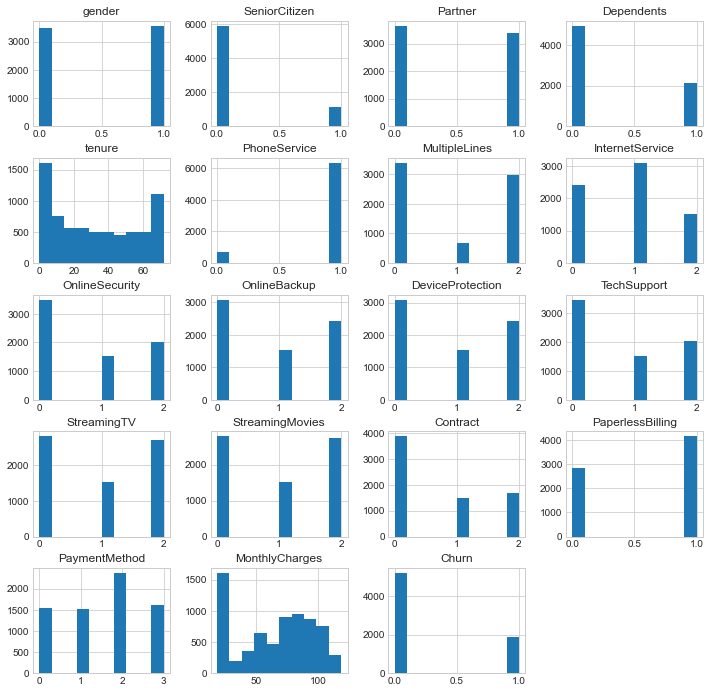

In [34]:
telco_dc.drop(['customerID'], axis = 1).hist(figsize =(12,12))
plt.show()

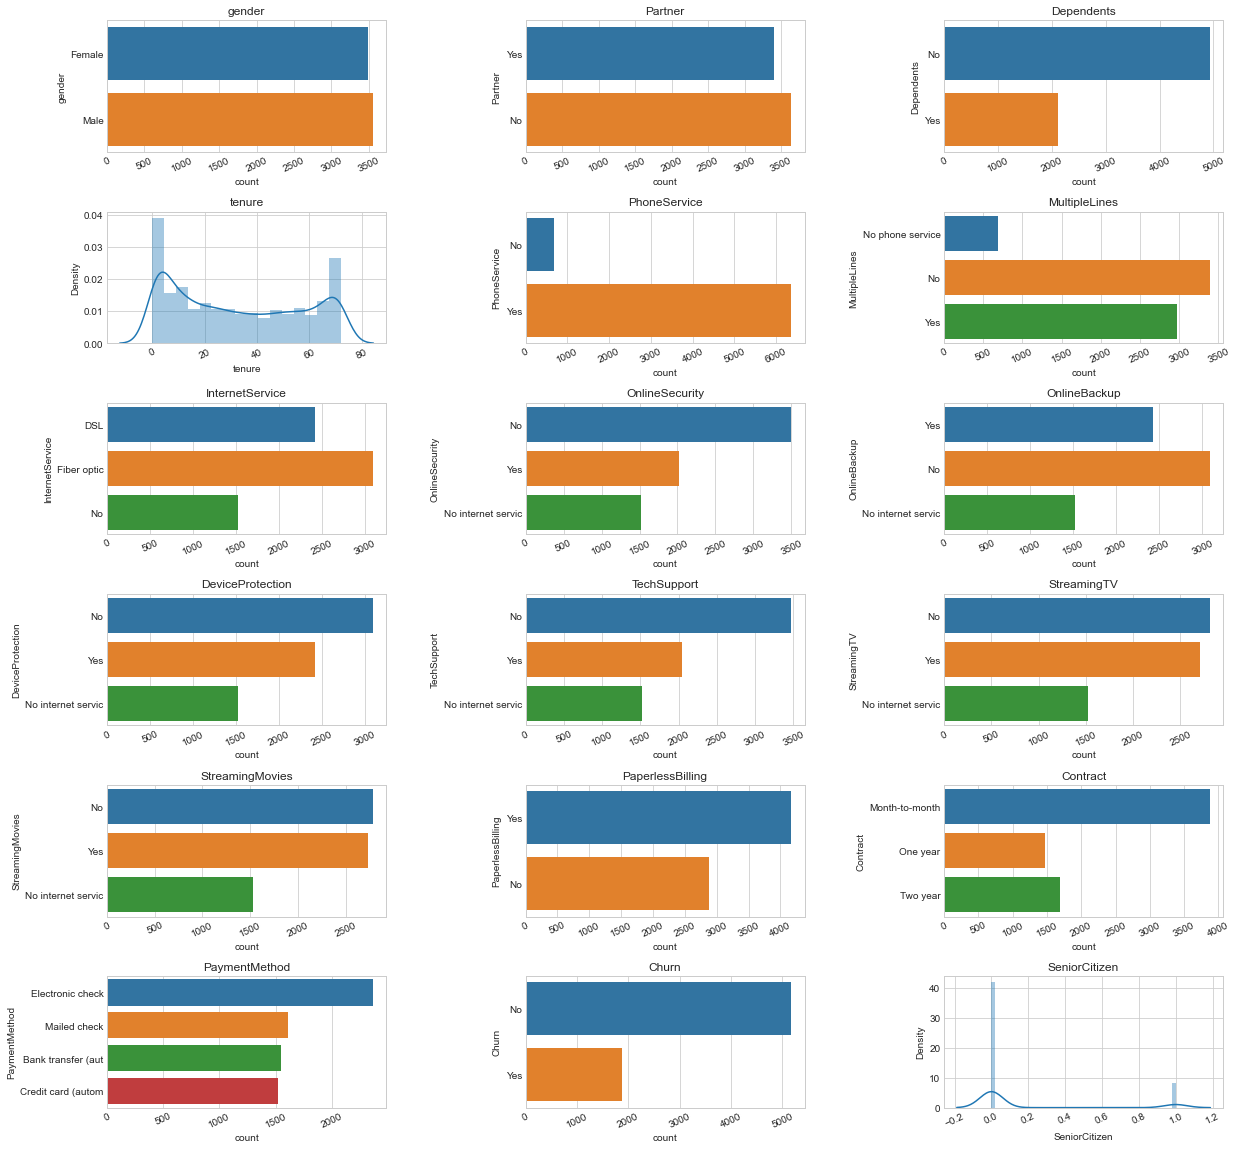

In [45]:
# add kudzai violin subplots and distplots
def plot_distribution(telco, cols=6, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(telco.shape[1]) / cols)
    for i, column in enumerate(telco.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if telco.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=telco)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(telco[column])
            plt.xticks(rotation=25)

cols_to_plot = ['gender', 'Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Contract','PaymentMethod','Churn','SeniorCitizen',]
plot_distribution(telco[cols_to_plot], cols=3, width=20, height=20, hspace=0.45, wspace=0.5)


#### 3. How are tenure and contract duration related?

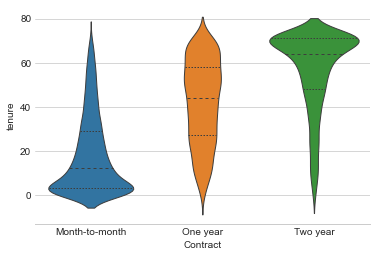

In [35]:
# relationship between Contract and Tenure

sns.violinplot(data=telco, x="Contract", y="tenure", 
               split=True, inner="quart", linewidth=1,)
sns.despine(left=True)
plt.show()

+ The tenure length decreases for month to month contract workers, slightly increases with the yearly contract workers and increases significantly with 2 year contracts 

#### 4. Look at the correlation between Churn and the other variables - are there strong negative or positive correlations? (Use f-regression or mutual-info-classif, for example)

In [40]:
# Some empty Spaces in TotalCharges, replacing with 0
telco_dc[telco_dc['TotalCharges'] == ' '] = 0

In [41]:
telco_dc.dropna(axis = 0,inplace = True)
telco_y = telco_dc['Churn']
telco_x = telco_dc.drop(['Churn', 'customerID'], axis = 1)

In [42]:
X_train, X_valid, y_train, y_valid = train_test_split(telco_x, telco_y, test_size=0.2, random_state=42)

Feature 0: 0.614831
Feature 1: 124.524087
Feature 2: 113.532166
Feature 3: 148.536227
Feature 4: 760.541605
Feature 5: 0.768871
Feature 6: 7.246890
Feature 7: 11.661348
Feature 8: 503.260775
Feature 9: 213.487262
Feature 10: 170.593405
Feature 11: 467.254851
Feature 12: 7.499982
Feature 13: 5.676121
Feature 14: 1023.737824
Feature 15: 215.417068
Feature 16: 60.393997
Feature 17: 209.473611
Feature 18: 218.771449


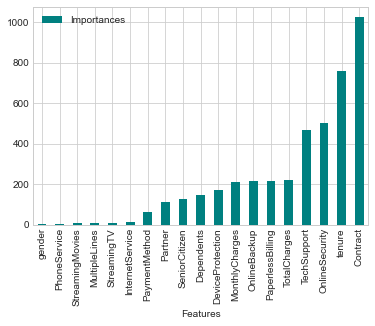

In [43]:
# correlation feature selection for numerical data using f test for -regression
#from sklearn.datasets import make_regression


def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
_, _, fs = select_features(X_train,y_train,X_valid)
final_df = pd.DataFrame({ "Features": pd.DataFrame(X_train).columns, "Importances": fs.scores_})
final_df.set_index('Importances')
# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances')
# plot the feature importances in bars.
final_df.plot.bar(color='teal', x='Features')
# what are scores for the feature
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))


+ The f regression test shows columns with a strong positive corelation based on the higher values of importance.

#### 5. Produce plots to look at churn vs tenure, contract, age, monthly and total charges.

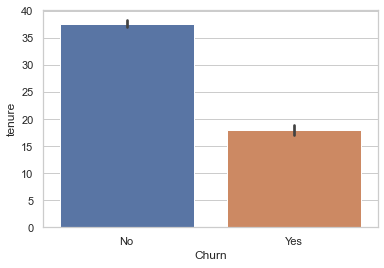

In [61]:
#Churn vs tenure
ax = sns.barplot(x="Churn", y="tenure", data=telco)

<AxesSubplot:xlabel='Churn', ylabel='Count'>

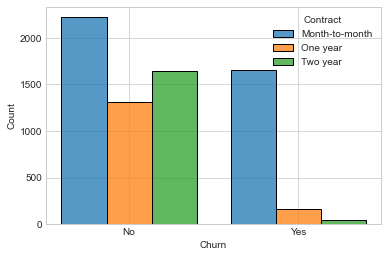

In [50]:
#churn vs contract
sns.histplot(data=telco, x="Churn", hue="Contract", multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='Churn', ylabel='Count'>

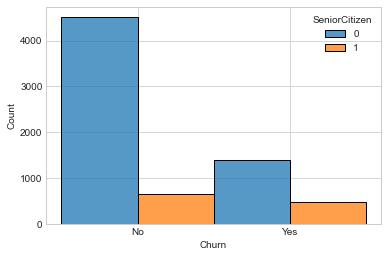

In [55]:
#church vs age
sns.histplot(data=telco, x="Churn", hue="SeniorCitizen", multiple="dodge")

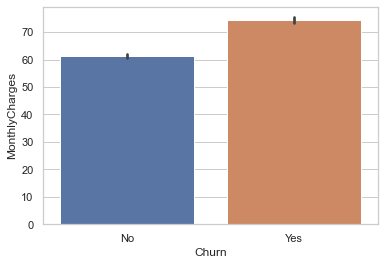

In [62]:
#churn vs Monthly charges
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Churn", y="MonthlyCharges", data=telco)

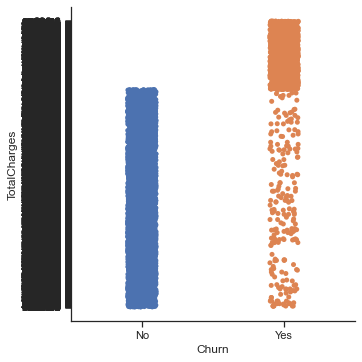

In [76]:
#telco['TotalCharges']
sns.set_theme(style="ticks")
g = sns.catplot(x="Churn", y="TotalCharges", data=telco)

#### 6. Use logistic regression (l1 norm) and a random forest to get a list of the most important variables. How different are they from each other, and how do these relate to the variables from the correlations n above?

logistic regression (l1 norm)

            Features  Importances
18      TotalCharges     0.000268
12       StreamingTV     0.011496
17    MonthlyCharges     0.022515
13   StreamingMovies     0.032226
0             gender     0.038916
4             tenure     0.054469
2            Partner     0.061547
16     PaymentMethod     0.065143
6      MultipleLines     0.072949
10  DeviceProtection     0.078344
9       OnlineBackup     0.150861
3         Dependents     0.161674
1      SeniorCitizen     0.181785
7    InternetService     0.228125
11       TechSupport     0.253857
8     OnlineSecurity     0.287346
15  PaperlessBilling     0.361186
14          Contract     0.709776
5       PhoneService     1.001156


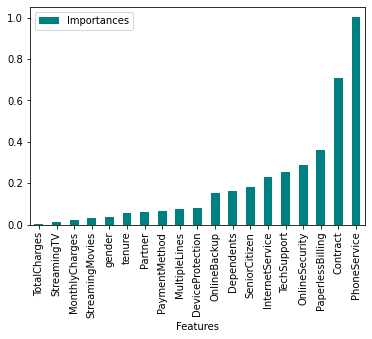

In [32]:
# Set the regularization parameter C=1
logistic = LogisticRegression(C=1, penalty="l1", solver='liblinear', random_state=5)
#model = SelectFromModel(logistic)  # this chooses the best features for us!
logistic.fit(X_train, y_train)
importances = np.abs(logistic.coef_)#model.feature_importances_#np.abs(lasso.coef_)
final_df = pd.DataFrame({ "Features": pd.DataFrame(X_train).columns, "Importances": list(importances.flatten())})
final_df.set_index('Importances')
# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances')
# plot the feature importances in bars.
final_df.plot.bar(color='teal', x='Features')
print(final_df)

Random Forest

            Features  Importances
5       PhoneService     0.006176
12       StreamingTV     0.014420
1      SeniorCitizen     0.014875
13   StreamingMovies     0.015352
2            Partner     0.015525
3         Dependents     0.015630
0             gender     0.016424
6      MultipleLines     0.019971
10  DeviceProtection     0.021006
15  PaperlessBilling     0.024774
9       OnlineBackup     0.028870
7    InternetService     0.040137
16     PaymentMethod     0.044637
11       TechSupport     0.055846
8     OnlineSecurity     0.073334
14          Contract     0.126554
17    MonthlyCharges     0.145704
18      TotalCharges     0.155717
4             tenure     0.165046


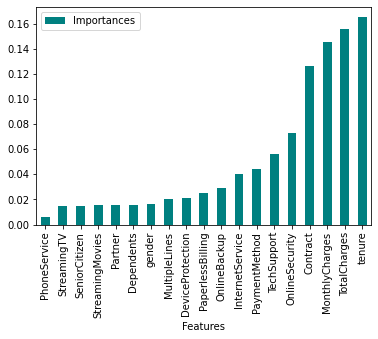

In [33]:
# create the random forest with your hyperparameters.

model = RandomForestClassifier(n_estimators=250, random_state=42, max_depth=10)
# fit the model to start training.
model.fit(X_train, y_train)
# get the importance of the resulting features.
importances = model.feature_importances_
# create a data frame for visualization.
final_df = pd.DataFrame({ "Features": pd.DataFrame(X_train).columns, "Importances": importances})
final_df.set_index('Importances')
# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances')
# plot the feature importances in bars.
final_df.plot.bar(color='teal', x='Features')
print(final_df)

+ The most important features of the data determined by the random forest closely corresponds to the positively correlated variables. The L1 norm technique might have failed t properly capture the most important features correctly due to the fact that the continous (non categorical) variables were not scaled, since linear models benefit from feature scaling.

### 1.1.4 Penguin Dataset
1. Perform PCA with 2 and then 4 components. Show the explained variance for the different PCs.
2. Then, for the PCA with 4 components, make a scatterplot for the first two principle components for a) the raw data and b) standardised data. What do you notice about these different plots? 10marks

In [34]:
penguin = sns.load_dataset("penguins")

In [35]:
penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [36]:
penguin.dropna(axis=0, inplace=True)

In [37]:
scaler = StandardScaler()
val = penguin.drop(['species', 'island','sex'], axis = 1)
penguin_stand = penguin.copy()

for i, k in enumerate(val.columns):
    print(val[k])
    print(np.array(val[k]).reshape(1, -1))
    scaler.fit(np.array(val[k]).reshape(1, -1))
    op = scaler.transform(np.array(val[k]).reshape(1, -1)) # standardise each column
    print(len(op))
    penguin_stand[k] =  list(op.flatten()) # replace each column with standardized variables

0      39.1
1      39.5
2      40.3
4      36.7
5      39.3
       ... 
338    47.2
340    46.8
341    50.4
342    45.2
343    49.9
Name: bill_length_mm, Length: 333, dtype: float64
[[39.1 39.5 40.3 36.7 39.3 38.9 39.2 41.1 38.6 34.6 36.6 38.7 42.5 34.4
  46.  37.8 37.7 35.9 38.2 38.8 35.3 40.6 40.5 37.9 40.5 39.5 37.2 39.5
  40.9 36.4 39.2 38.8 42.2 37.6 39.8 36.5 40.8 36.  44.1 37.  39.6 41.1
  36.  42.3 39.6 40.1 35.  42.  34.5 41.4 39.  40.6 36.5 37.6 35.7 41.3
  37.6 41.1 36.4 41.6 35.5 41.1 35.9 41.8 33.5 39.7 39.6 45.8 35.5 42.8
  40.9 37.2 36.2 42.1 34.6 42.9 36.7 35.1 37.3 41.3 36.3 36.9 38.3 38.9
  35.7 41.1 34.  39.6 36.2 40.8 38.1 40.3 33.1 43.2 35.  41.  37.7 37.8
  37.9 39.7 38.6 38.2 38.1 43.2 38.1 45.6 39.7 42.2 39.6 42.7 38.6 37.3
  35.7 41.1 36.2 37.7 40.2 41.4 35.2 40.6 38.8 41.5 39.  44.1 38.5 43.1
  36.8 37.5 38.1 41.1 35.6 40.2 37.  39.7 40.2 40.6 32.1 40.7 37.3 39.
  39.2 36.6 36.  37.8 36.  41.5 46.5 50.  51.3 45.4 52.7 45.2 46.1 51.3
  46.  51.3 46.6 51.7 47.  

In [38]:
penguin_stand.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.0,0.0,0.0,0.0,Male
1,Adelie,Torgersen,0.0,0.0,0.0,0.0,Female
2,Adelie,Torgersen,0.0,0.0,0.0,0.0,Female
4,Adelie,Torgersen,0.0,0.0,0.0,0.0,Female
5,Adelie,Torgersen,0.0,0.0,0.0,0.0,Male


In [39]:
le.fit(penguin['sex'])
penguin['sex'] = le.transform(penguin['sex'])

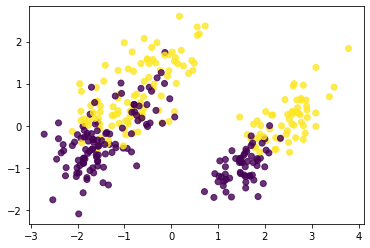

In [85]:
pca = PCA(n_components=2)
scaler.fit(penguin.drop(['species', 'island', 'sex'], axis = 1))
 
x_pca = pca.fit_transform(scaler.transform(penguin.drop(['species', 'island', 'sex'], axis = 1)))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=penguin['sex'], alpha=0.8, marker='o')
plt.show()

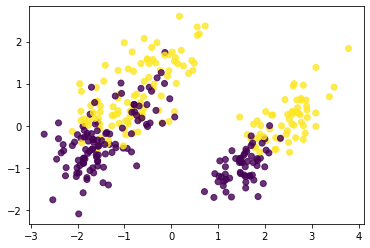

In [86]:
pca = PCA(n_components=4)
scaler.fit(penguin.drop(['species', 'island', 'sex'], axis = 1))
 
x_pca = pca.fit_transform(scaler.transform(penguin.drop(['species', 'island', 'sex'], axis = 1)))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=penguin['sex'], alpha=0.8, marker='o')
plt.show()

Variance Explained

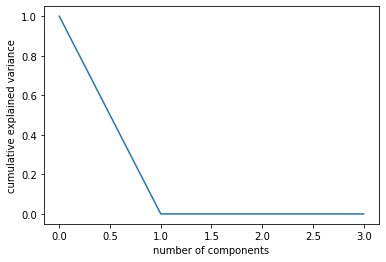

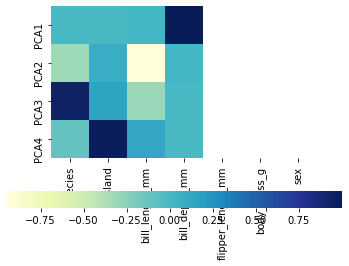

Total Variance Captured by Principle Components: 99.99999999999997%


In [51]:
def plot_cumul_var(pcamodel):
    plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
    plt.ylabel('Explained variance')
    plt.xlabel('Components')
    plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
             np.cumsum(pcamodel.explained_variance_),
             c='red',
             label="Cumulative Explained Variance")
    plt.legend(loc='upper left')
    plt.show()


def plot_expl_var_ratio(pcamodel):
    plt.plot(pcamodel.explained_variance_ratio_)
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()

#PCA1 is at 0 in xscale

def plot_expl_variance(pcamodel):
    plt.plot(pcamodel.explained_variance_)
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()

def plot_heatmap(pcamodel, columns):
    ax = sns.heatmap(pcamodel.components_,
                     cmap='YlGnBu',
                     yticklabels=[ "PCA"+str(x) for x in range(1,pcamodel.n_components_+1)],
                     xticklabels=columns,
                     cbar_kws={"orientation": "horizontal"})
    ax.set_aspect("equal")
    plt.show()

# plot variance ratio
plot_expl_var_ratio(pca)
# plot a heatmap showing which variables are contributing to each PC
plot_heatmap(pca, list(penguin.columns))
print('Total Variance Captured by Principle Components: {0}%'.format(pca.explained_variance_ratio_.sum()*100.))

a) Raw

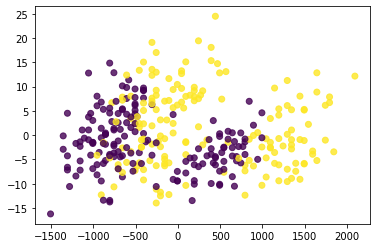

In [80]:
pca = PCA(n_components=4)
 
x_pca = pca.fit_transform(penguin.drop(['species', 'island', 'sex'], axis = 1))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=penguin['sex'], alpha=0.8, marker='o')
plt.show()

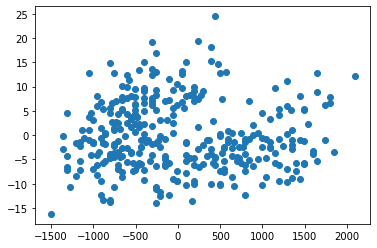

In [81]:
# The first two principal components for the raw data.
plt.figure()
plt.scatter(x_pca[:,0], x_pca[:,1])
plt.show()

b) Standardized

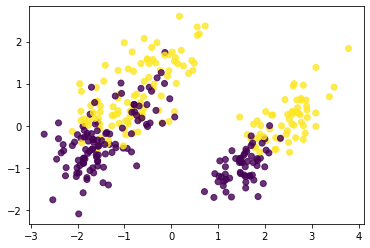

In [83]:
pca = PCA(n_components=4)
scaler.fit(penguin.drop(['species', 'island', 'sex'], axis = 1))

x_pca = pca.fit_transform(scaler.transform(penguin.drop(['species', 'island', 'sex'], axis = 1)))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=penguin['sex'], alpha=0.8, marker='o')
plt.show()

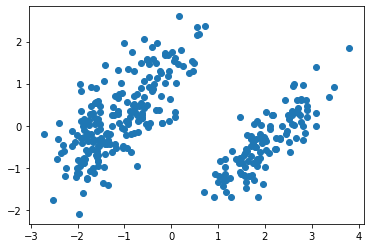

In [84]:
# The first two principal components for the standardised
plt.figure()
plt.scatter(x_pca[:,0], x_pca[:,1])
plt.show()

What do we notice?
+ The principal components for the raw data has higher variance (more dispersed) than that of the standardised one.
+ Standardization ensured that the data principal components could be properly seperated within their relevant axes.

***